In [6]:
import numpy as np
import cv2 as cv
import sys
sys.path.append("../")
from matplotlib import pyplot as plt
from quadtree import FixedQuadTree

In [7]:
to_size = (8, 8, 3)
fixed_length = 194

# test_1_path = 'test1.jpg'
test_1_path = 'test2.JPG'
test_2_path = 'test2.JPEG'

In [8]:
def seqence_image(image_path):
    img = cv.imread(image_path)
    img = cv.resize(img, (224, 224))

    grey_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gray_img = cv.GaussianBlur(grey_img, (3, 3), 0)

    edges = cv.Canny(gray_img, 80, 100)

    qdt = FixedQuadTree(domain = edges, fixed_length = fixed_length)

    seq_img = qdt.serialize(img, size = to_size)
    seq_img = np.asarray(seq_img)
    seq_img = np.reshape(seq_img, [to_size[0], -1, to_size[2]])

    return seq_img, qdt

In [9]:
seq_img, qdt = seqence_image(test_1_path)

[ WARN:0@13.639] global /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_f6tvh9615u/croot/opencv-suite_1691620375715/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('test2.JPG'): can't open/read file: check file path/integrity


error: OpenCV(4.6.0) /private/var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_f6tvh9615u/croot/opencv-suite_1691620375715/work/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


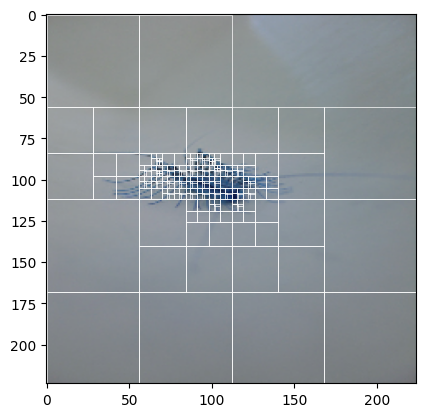

194


In [ ]:
fig, ax = plt.subplots()
img = cv.imread(test_1_path)
img = cv.resize(img, (224, 224))
ax.imshow(img, cmap = 'gray')
qdt.draw(ax=ax)
plt.show()
print(qdt.count_patches())
plt.close()